<a href="https://colab.research.google.com/github/gokul-pv/EVA6_Assignments_Session10/blob/main/PartB/EVA6_Session_10_COCO_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/gokul-pv/EVA6_Assignments_Session10

fatal: destination path 'EVA6_Assignments_Session10' already exists and is not an empty directory.


In [2]:
% cd EVA6_Assignments_Session10/PartB/

/content/EVA6_Assignments_Session10/PartB


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
df = pd.read_excel("coco_schema.xlsx")

In [5]:
df.rename(columns={"id:": "ID", "height:":"Height" ,	"width:":"Width"},inplace=True)

In [6]:
df

,ID,Height,Width,bbox_a,bbox_b,bbox_c,bbox_d
0,0,330,1093,69,464,312,175
1,1,782,439,359,292,83,199
2,3,645,831,297,312,267,167
3,34,943,608,275,112,319,290
4,20,593,857,71,368,146,147
...,...,...,...,...,...,...,...
10100,2,285,550,62,129,234,142
10101,37,735,340,389,78,140,158
10102,15,677,665,359,240,297,258
10103,69,474,653,95,168,271,138


In [7]:
classes = ['person','bicycle','car','motorcycle','airplane','bus','train','truck','boat','traffic light','fire hydrant','stop sign','parking meter',
           'bench','bird','cat','dog','horse','sheep','cow','elephant','bear','zebra','giraffe','backpack','umbrella','handbag','tie','suitcase','frisbee',
           'skis','snowboard','sports ball','kite','baseball bat','baseball glove','skateboard','surfboard','tennis racket','bottle','wine glass','cup','fork',
           'knife','spoon','bowl','banana','apple','sandwich','orange','broccoli','carrot','hot dog','pizza','donut','cake','chair','couch','potted plant','bed',
           'dining table','toilet','tv','laptop','mouse','remote','keyboard','cell phone','microwave','oven','toaster','sink','refrigerator','book','clock','vase',
           'scissors','teddy bear','hair drier','toothbrush']

In [8]:
def get_class(i):
    return classes[i]

In [9]:
df['class'] = df['ID'].map(get_class)

In [10]:
class_counts = dict(df['class'].value_counts())
class_counts

{'airplane': 139,
 'apple': 123,
 'backpack': 129,
 'banana': 116,
 'baseball bat': 125,
 'baseball glove': 110,
 'bear': 132,
 'bed': 137,
 'bench': 131,
 'bicycle': 111,
 'bird': 130,
 'boat': 126,
 'book': 135,
 'bottle': 125,
 'bowl': 123,
 'broccoli': 130,
 'bus': 133,
 'cake': 118,
 'car': 142,
 'carrot': 122,
 'cat': 121,
 'cell phone': 145,
 'chair': 122,
 'clock': 117,
 'couch': 132,
 'cow': 140,
 'cup': 137,
 'dining table': 106,
 'dog': 122,
 'donut': 134,
 'elephant': 142,
 'fire hydrant': 102,
 'fork': 129,
 'frisbee': 113,
 'giraffe': 117,
 'hair drier': 122,
 'handbag': 119,
 'horse': 132,
 'hot dog': 102,
 'keyboard': 120,
 'kite': 140,
 'knife': 128,
 'laptop': 128,
 'microwave': 136,
 'motorcycle': 138,
 'mouse': 141,
 'orange': 126,
 'oven': 132,
 'parking meter': 142,
 'person': 138,
 'pizza': 105,
 'potted plant': 133,
 'refrigerator': 122,
 'remote': 125,
 'sandwich': 121,
 'scissors': 133,
 'sheep': 128,
 'sink': 117,
 'skateboard': 123,
 'skis': 122,
 'snowboard

In [11]:
data = class_counts
names = list(data.keys())
values = list(data.values())


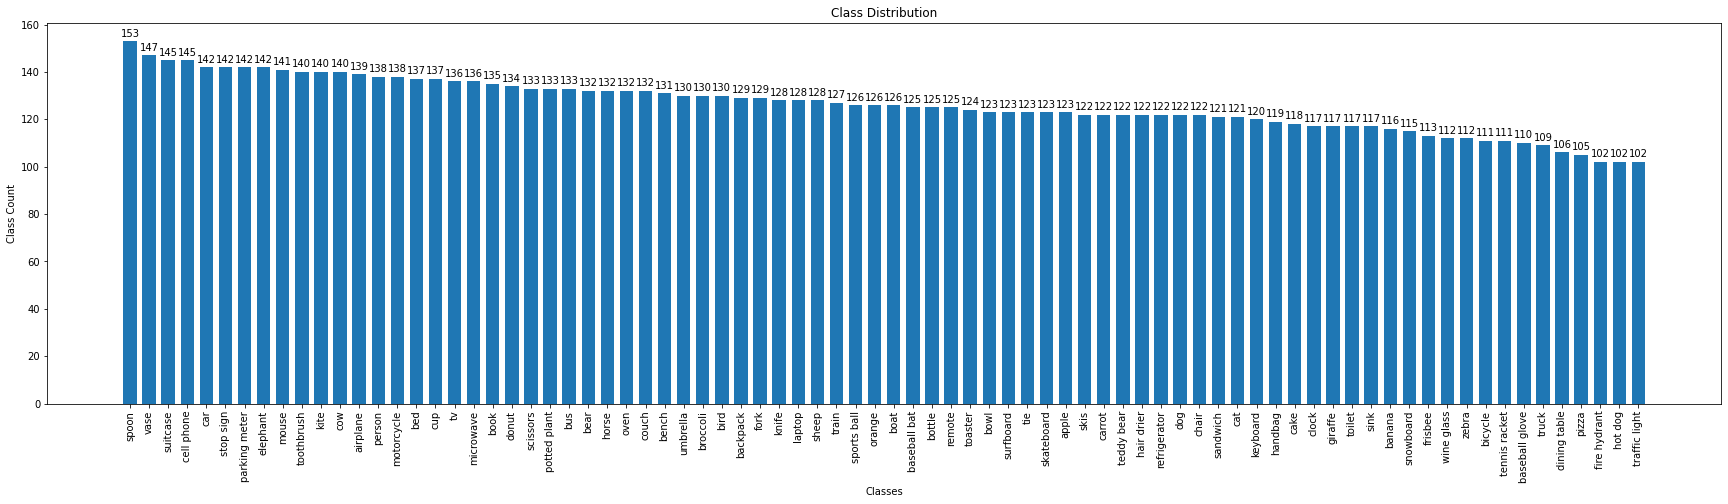

In [12]:
plt.figure(figsize=(30, 7)) 
plt.bar(range(len(data)), values, tick_label=names, width=0.7)
for l in range(len(values)):
    plt.annotate(values[l], (-0.50 + l, values[l] + 2))
plt.xticks(rotation='90')
plt.xlabel("Classes")
plt.ylabel("Class Count")
plt.title("Class Distribution")
plt.show()

In [13]:
df['Bnorm_height'] = df['bbox_d']/df['Height']
df['Bnorm_Width'] = df['bbox_c']/df['Width']

df.describe()

,ID,Height,Width,bbox_a,bbox_b,bbox_c,bbox_d,Bnorm_height,Bnorm_Width
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,39.540228,693.970411,689.064127,253.250668,250.375656,218.191687,221.296091,0.325578,0.323393
std,23.260585,204.740106,205.511390,144.472634,144.800883,104.760861,104.369727,0.145902,0.147178
min,0.000000,91.000000,94.000000,0.000000,0.000000,40.000000,40.000000,0.047344,0.046964
25%,19.000000,551.000000,541.000000,128.000000,125.000000,128.000000,131.000000,0.217931,0.211538
50%,40.000000,696.000000,690.000000,255.000000,251.000000,217.000000,222.000000,0.320138,0.316785
75%,60.000000,839.000000,833.000000,380.000000,376.000000,308.000000,311.000000,0.415625,0.414195
max,79.000000,1232.000000,1282.000000,500.000000,500.000000,400.000000,400.000000,0.877551,0.894366


In [14]:
df

,ID,Height,Width,bbox_a,bbox_b,bbox_c,bbox_d,class,Bnorm_height,Bnorm_Width
0,0,330,1093,69,464,312,175,person,0.530303,0.285453
1,1,782,439,359,292,83,199,bicycle,0.254476,0.189066
2,3,645,831,297,312,267,167,motorcycle,0.258915,0.321300
3,34,943,608,275,112,319,290,baseball bat,0.307529,0.524671
4,20,593,857,71,368,146,147,elephant,0.247892,0.170362
...,...,...,...,...,...,...,...,...,...,...
10100,2,285,550,62,129,234,142,car,0.498246,0.425455
10101,37,735,340,389,78,140,158,surfboard,0.214966,0.411765
10102,15,677,665,359,240,297,258,cat,0.381093,0.446617
10103,69,474,653,95,168,271,138,oven,0.291139,0.415008


In [49]:
df_final = df[['Bnorm_Width','Bnorm_height']]
df_final

,Bnorm_Width,Bnorm_height
0,0.285453,0.530303
1,0.189066,0.254476
2,0.321300,0.258915
3,0.524671,0.307529
4,0.170362,0.247892
...,...,...
10100,0.425455,0.498246
10101,0.411765,0.214966
10102,0.446617,0.381093
10103,0.415008,0.291139


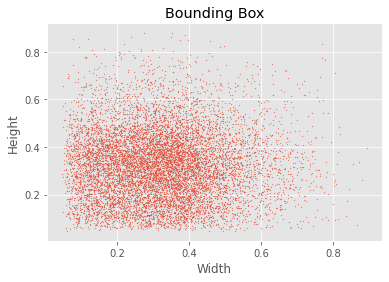

In [51]:
from matplotlib import style
style.use('ggplot')
plt.scatter(df_final['Bnorm_Width'], df_final['Bnorm_height'], s=3, marker='.', alpha=0.5)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Bounding Box")
plt.show()

## Apply elbow method to find out k

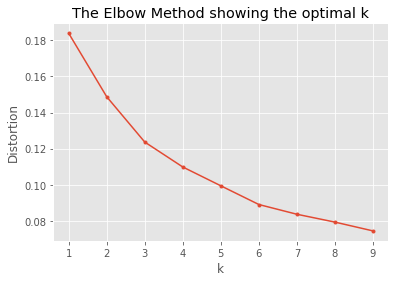

In [53]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist


# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_final)
    kmeanModel.fit(df_final)
    distortions.append(sum(np.min(cdist(df_final, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) /df_final.shape[0])

# Plot the elbow
plt.plot(K, distortions, '.-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## **Iou Method to find out K**

### IOU(Intersection over union) = intersected area of bbox and anchor box/ Union area of bbox and anchor box
#### bw = bounding box width, bh - bounding box height, aw - anchor box width, ah - anchor box height
#### IOU = min(bw,aw) * min(bh, ah)/bw*bh + aw*ah - min(bw,aw) * min(bh, ah)
#### mean IOU = sum(IOU)/len(IOU)

In [54]:
height = list(df_final['Bnorm_height'])
width = list(df_final['Bnorm_Width'])
ks = range(1,10)
meaniou = []
for k in ks:
    cl = KMeans(n_clusters=k)
    cl.fit(df_final)
    cx = []
    cy = []
    mapcx  = {}
    mapcy = {}
    iou = []
    for i in range(df_final.shape[0]):
        
        l = cl.labels_[i]
        cx.append(cl.cluster_centers_[l][0])
        cy.append(cl.cluster_centers_[l][1])
        iou.append(min(width[i] ,cx[i])* min(height[i] , cy[i])/(height[i]*width[i]+ cx[i]*cy[i]- min(width[i] , cx[i])* min(height[i] ,cy[i])))
    meaniou.append(sum(iou)/df_final.shape[0]) 

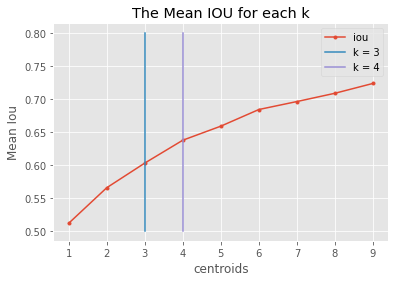

In [77]:
plt.plot(range(1,10),meaniou,'.-',label = "iou")
plt.plot([3,3],[0.5,0.8],label = "k = 3")
plt.plot([4,4],[0.5,0.8],label = "k = 4")
plt.xlabel('centroids')
plt.ylabel('Mean Iou')
plt.title('The Mean IOU for each k')
plt.legend()
plt.show()

In [59]:
meaniou[3],meaniou[4],meaniou[5],meaniou[6]

(0.6376763935389074, 0.6590005168054447, 0.684250905545166, 0.6963563852287247)

In [87]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
    
def plot_anchor_boxes(cl3):        
  xdata = np.array([0.5]*len(cl3.cluster_centers_))
  ydata = np.array([0.5]*len(cl3.cluster_centers_))

  xerror = np.array([list(np.exp(cl3.cluster_centers_[:, 0])/2)]*2)
  yerror = np.array([list(np.exp(cl3.cluster_centers_[:, 1])/2)]*2)

  errorboxes = []

  for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T):
    rect = Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
    errorboxes.append(rect)

  pc = PatchCollection(errorboxes, facecolor='None', alpha=1, edgecolor='b')
  fig, ax = plt.subplots(1)

  ax.add_collection(pc)
  plt.title(f'Anchor Boxes for k = {cl3.n_clusters}')
  artists = plt.errorbar(xdata, ydata, xerr=xerror, yerr=yerror, fmt='None', ecolor='None')

In [88]:
array_points = np.array(df_final)

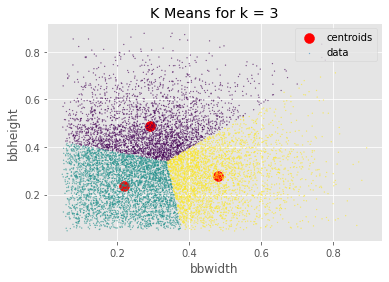

In [89]:
cl3 = KMeans(3)
cl3.fit(array_points)

plt.scatter(cl3.cluster_centers_[:,0] ,cl3.cluster_centers_[:,1], color='red',s = 100,marker = 'o', label='centroids')
plt.scatter(list(df_final['Bnorm_Width']), list(df_final['Bnorm_height']), 
            s=3,marker=".", alpha = 0.5, c=list(cl3.labels_.astype(float)), label = "data")
plt.legend()
plt.xlabel('bbwidth')
plt.ylabel('bbheight')
plt.title('K Means for k = 3')
plt.legend()
plt.show()

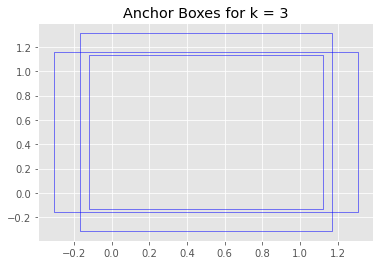

In [90]:
plot_anchor_boxes(cl3)

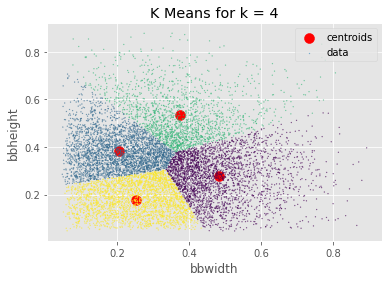

In [91]:
cl3 = KMeans(4)
cl3.fit(array_points)

plt.scatter(cl3.cluster_centers_[:,0] ,cl3.cluster_centers_[:,1], color='red',s = 100,marker = 'o', label='centroids')
plt.scatter(list(df_final['Bnorm_Width']), list(df_final['Bnorm_height']), 
            s=3,marker=".", alpha = 0.5, c=list(cl3.labels_.astype(float)), label = "data")
plt.legend()
plt.xlabel('bbwidth')
plt.ylabel('bbheight')
plt.title('K Means for k = 4')
plt.legend()
plt.show()


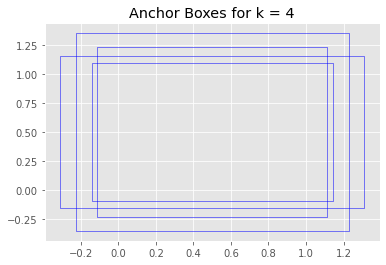

In [92]:
plot_anchor_boxes(cl3)